In [1]:
import numpy  as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn import tree
import seaborn as sns
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
data=pd.read_csv("train.csv")
data.head()
labelencoder=preprocessing.LabelEncoder()
changed_sex=labelencoder.fit_transform(data["Sex"])
changed_sex=pd.Series(changed_sex)
changed_sex.head()
data["Sex"]=changed_sex
data.head()
data1=data.drop(["Name","SibSp","Parch","Ticket","Cabin","Embarked","PassengerId","Pclass"],axis=1)
data1.head()
data1.isna().sum()
data1.dropna()
data1.drop_duplicates()

,Survived,Sex,Age,Fare
0,0,1,22.0,7.2500
1,1,0,38.0,71.2833
2,1,0,26.0,7.9250
3,1,0,35.0,53.1000
4,0,1,35.0,8.0500
...,...,...,...,...
883,0,0,39.0,29.1250
885,1,0,19.0,30.0000
886,0,0,45.0,23.4500
887,1,1,26.0,30.0000


In [11]:
data1.head()


,Survived,Sex,Age,Fare
0,0,1,22.0,7.2500
1,1,0,38.0,71.2833
2,1,0,26.0,7.9250
3,1,0,35.0,53.1000
4,0,1,35.0,8.0500


In [12]:
rf_model=RandomForestClassifier()

In [15]:
rf_model.fit(X=data1[["Sex","Age","Fare"]],y=data["Survived"])
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)

Age 0.26684654030541105
Sex 0.2875723070530933
Fare 0.4455811526414958


In [16]:
tree_model=tree.DecisionTreeClassifier(max_depth=6)
model=tree_model.fit(X=pd.DataFrame(data1[["Age","Sex","Fare"]]),y=data1["Survived"])
model
with open("Dtree3.dot","w") as f:
    f=tree.export_graphviz(model,feature_names=["Age","Sex","Fare"],out_file=f);


model.score(X=pd.DataFrame(data1[["Age","Sex","Fare"]]),y=data1["Survived"])

0.829021372328459

In [17]:
data2=pd.read_csv("test.csv")
data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [18]:
data3=data2.drop(["Name","PassengerId","Pclass","SibSp","Parch","Ticket","Embarked"],axis=1)
newsex=labelencoder.fit_transform(data2["Sex"])
newsex=pd.Series(newsex)
newsex
data3["Sex"]=newsex
data3.isnull().sum()

Sex     0
Age     0
Fare    0
dtype: int64

In [19]:
features=pd.DataFrame(data3[["Age","Sex","Fare"]])
ypred=model.predict(X=features)
survived=pd.DataFrame({"PassengerId":data2["PassengerId"],"Survived":ypred})
survived.to_csv("output1.csv",index=False);

In [25]:
z=len(ypred)
z

417

In [31]:
c=data["Survived"]
zz=c[0:417]
print(len(zz))

417


ValueError: x and y must be the same size

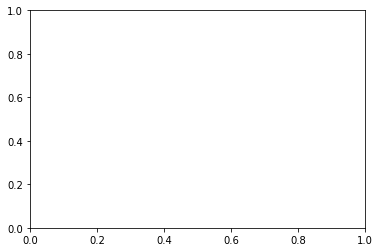

In [30]:
plt.scatter(z,zz)